# *Сборный проект*
### Описание проекта

Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
У нас  есть данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

***Описание данных***
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Шаг 1. Откроем файл с данными и изучим общую информацию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st
from pymystem3 import Mystem
m = Mystem()
import seaborn as sns
import re

### 1.1. Загружаем данные

In [2]:
try:
    df_games = pd.read_csv('games.csv')
except:
    df_games = pd.read_csv('/datasets/games.csv')

### 1.2. Посмотрим на датасет, информацию по нему и числовое описание данных.

In [3]:
df_games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df_games.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


### Вывод:

1. Всего 16715 игр
2. Проуски:
   * Name
   * Year_of_Release
   * Genre
   * Critic_Score
   * User_Score
   * Rating
3. Есть игры, которые не продавались (минимальные значения у столбцов sales = 0). Возможно у этих игр и нет рейтинга.
4. Изменим тип данных Year_of_Release на int. Изменим тип данных на float в столбце User_Score.
5. Приведем названия столбцов к нижнему регистру.

## Шаг 2. Предобработка данных
### 2.1. Приведём названия столбцов к нижнему регистру

In [6]:
df_games.columns = df_games.columns.str.lower()

### 2.2. Преобразуем данные в нужные типы.

#### 2.2.1. Изменим тип данных Year_of_Release на int, потому что год не может быть float

In [7]:
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')

#### 2.2.2. Изменим тип данных user_score на float

Посмотрим значения по user_score

In [8]:
df_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Посмотрим на значения tbd в user_score.
tbd - ознаяает что оценка пользователей еще не определена.

In [9]:
df_games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Изменим тип user_score на float

In [10]:
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce').astype('float64')
df_games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Теперь tbd превратились в NAN

In [11]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Все получилось

### 2.3. Посмотрим пропуски.
#### 2.3.1. Пропуски в name

In [12]:
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в name только в 1993 году на платформе GEN. Посмотрим 1993 год на этой платформе.

In [13]:
df_games.query('platform == "GEN" and year_of_release == 1993')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Удалим пропуски в name. Потому что не представляется возможным восстановить данные и в других стобцах (genre, critic_score, user_score, rating) тоже пропуски.

In [14]:
df_games = df_games.drop([659, 14244]).reset_index()
df_games = df_games.drop(columns=['index'])

#### 2.3.2. Посмотрим на пропуски в Year_of_Release

In [15]:
df_games[df_games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В названии некоторых игр встречается год выпуска. Возмем год из названия игры (4 цифры подряд). Этими значениями заполним пропуски в year_of_release.

In [16]:
def year(row):
    if pd.isna(row['year_of_release']):
        match = re.search(r'\d{4}', row['name'])
        return int(match[0]) if match else np.NaN
    return row['year_of_release']

df_games['year_of_release'] = df_games.apply(year, axis=1)

In [17]:
df_games.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16346,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропусков стало немого меньше.

Есть игры, выпущеные на разных платформах в один год. С помощью mode найдем наиболее встречающиеся года по одной игре и замеим этими годами пропуски в year_of_release. Остальное оставим NaN

Оставшиеся пропуски оставим без изменения.

In [18]:
#def func(series):
#    modes = series.mode()
#    return modes[0] if len(modes) > 0 else np.nan

#working = df_games.groupby('name')['year_of_release'].agg(func).to_dict()
 
#def year_fill(row):
#    if pd.isna(row['year_of_release']):
#        return working[row['name']]
#    return row['year_of_release']
 

#df_games['year_of_release'] = df_games.apply(year_fill, axis=1)

In [19]:
#df_games.query('year_of_release.isna()')

139 пропусков лучше чем 269.

#### 2.3.3. Пропуски genre

In [20]:
df_games.query('genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски были удалены вместе с пропускам name

#### 2.3.4. Пропуски в critic_score, user_score 

Оставим как есть. Потому что оценки критиков и пользователей на разных платформах могут различаться.

#### 2.3.5. Пропуски rating заменим по типу замены в year_of_release.

In [21]:
def func1(series):
    modes = series.mode()
    return modes[0] if len(modes) > 0 else np.nan

working1 = df_games.groupby('name')['rating'].agg(func1).to_dict()

#working = df_games.groupby('name')['year_of_release'].median().to_dict()
 
def rating(row):
    if pd.isna(row['rating']):
        return working1[row['name']]
    return row['rating']
 

df_games['rating'] = df_games.apply(rating, axis=1)

Остальные пропуски обозначим как отсутсвие рейтинга - NO

In [22]:
df_games['rating'] = df_games['rating'].fillna('NO')

In [23]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16461 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16713 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Все получилось.

### 2.4. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [24]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

In [25]:
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NO,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NO,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NO,0.01
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NO,0.01
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NO,0.01
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NO,0.01


### 2.5. Посмотрим дубликаты

In [26]:
df_games.duplicated().sum()

0

Дубликатов не обнаружено

## Шаг 3. Проведите исследовательский анализ данных

### 3.1. Посмотрим, сколько игр выпускалось в разные годы.

Посмотрим цифровые значения

In [27]:
df_games.groupby('year_of_release')['name'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     830
2003.0     779
2004.0     764
2005.0     941
2006.0    1008
2007.0    1198
2008.0    1429
2009.0    1427
2010.0    1255
2011.0    1137
2012.0     653
2013.0     545
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

Напишем функцию для посторения сторбчатого графика.

In [28]:
def plot_bar(df, group, colu, sc):
    (df.groupby(group).agg({colu: sc})
       .plot(kind='bar', title=('Кол-во выпускаемых игр'),
               figsize=(20,10), grid=True)
    )
    if group == 'year_of_release':
        plt.xlabel('Год выпуска игры')
    elif group == 'platform':
        plt.xlabel('Платформа игры')
    if colu == 'name':
        plt.ylabel('Кол-во игр')
    elif colu == 'total_sales':
        plt.ylabel('Кол-во проданых игр, млн. копий')

    plt.show()

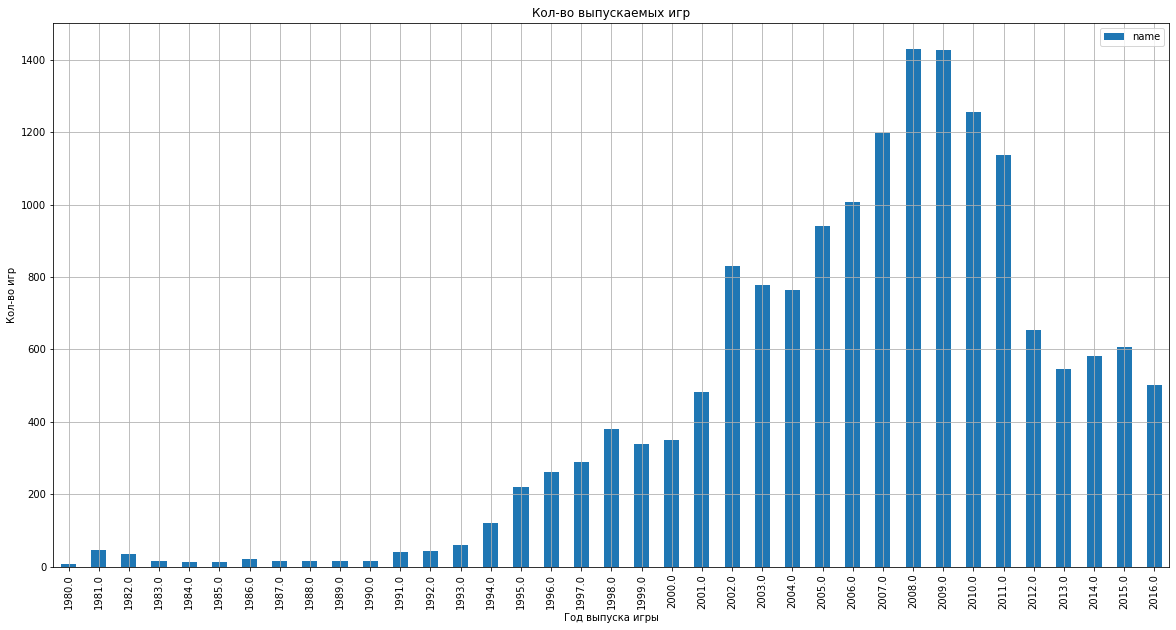

In [29]:
plot_bar(df_games, 'year_of_release', 'name', 'count')

До 1991-1994 годов игр практически не было. Потом они начали появляться, сначала на MS-DOS, потом уже на Windows. Резкий скачок по количеству игр, выпущенных в год, произошел в 2002 году. Пик - 2008-2009 года. После этого начался спад, связанный с развитием мобильных устройств, интеграция соц. сетей в жизнь людей. Это всё привело к тому, что интерес к самим играм упал, соответственно, упало и их производство.



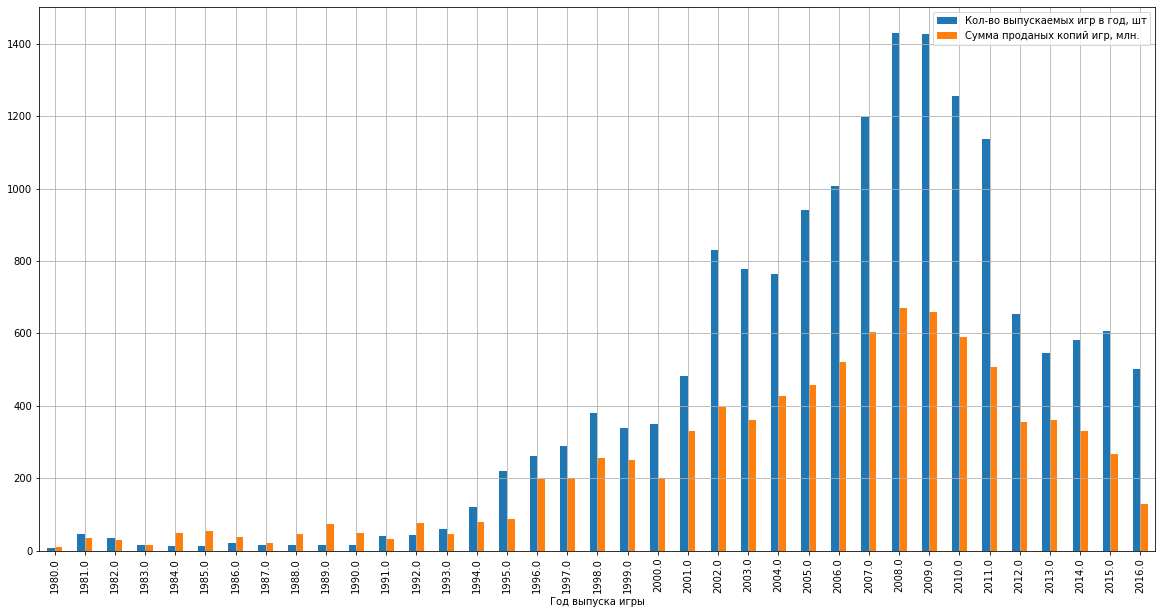

In [30]:
(df_games.pivot_table(index=['year_of_release'], values=('total_sales'), aggfunc=('sum','count'))
         .plot(kind='bar', figsize=(20,10), grid=True)
)
plt.xlabel('Год выпуска игры')
plt.legend(['Кол-во выпускаемых игр в год, шт', 'Сумма проданых копий игр, млн.'])
plt.show()

Прослеживается прямая зависимоть от кол-ва выпущеных игр и суммы проданых копий игр. Так-как суммы проданых копий игр у нас измеряется в млн. копий, график сум продаж меньше чем выпущеных игр. Но после 2012 года тенденция меняется. производство игр пытаются нарастить, но спрос все ровно падает.

Брать за основу анализа весь период с 1980 по 2016 года, думаю не надо. Потому что игры 1980 года значительно отличаются от игр пика (2009 г.) графикой, сценариями, платформами и т.д. Актуальный период, думаю, 10-15 последних лет.

### 3.2. Посмотриv, как менялись продажи по платформам. 

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [31]:
(df_games.groupby('platform').agg({'total_sales': sum})
   .sort_values('total_sales', ascending=False))

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


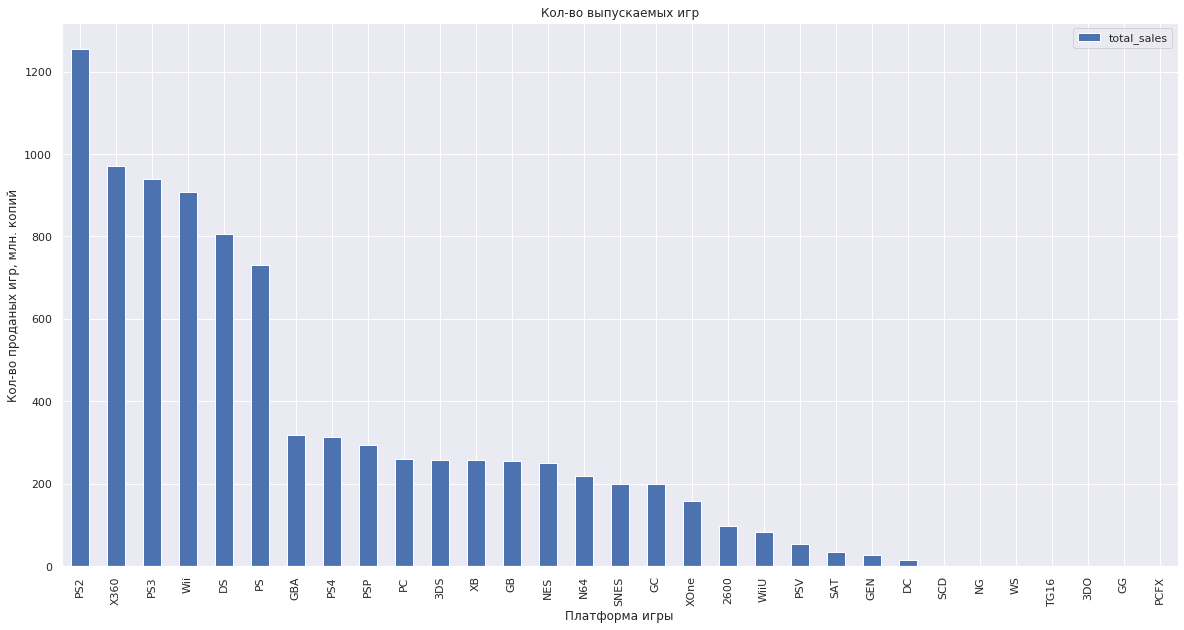

In [103]:
#plot_bar(df_games, 'platform', 'total_sales', 'sum')
(df_games.groupby('platform').agg({'total_sales': sum})
   .sort_values('total_sales', ascending=False)
   .plot(kind='bar', title=('Кол-во выпускаемых игр'),
               figsize=(20,10), grid=True)
    )
plt.xlabel('Платформа игры')
plt.ylabel('Кол-во проданых игр, млн. копий')

plt.show()

Лидером является платформа PS2. Ожидаемо, она у всех давно на слуху. Далее идут Xbox360, PS3 и Wii.

Для меня было странно увидеть PC в аутсайдерах по кол-ву игр.

Отберем саме популярные платформы. Платформы, на которые продали более 600 млн. копий игр.

In [104]:
df = df_games.groupby('platform')['total_sales'].sum().reset_index().query('total_sales > 600')
df

,platform,total_sales
4,DS,806.12
15,PS,730.86
16,PS2,1255.77
17,PS3,939.65
26,Wii,907.51
28,X360,971.42


Для удобства создадим список и датафрейм с самыми популярными платформами.

In [105]:
top_platform = df['platform'].tolist()
top_platform


['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360']

In [106]:
df_games_top = df_games.query('platform == @top_platform').reset_index()
df_games_top = df_games_top.drop(columns=['index'])
df_games_top

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
9417,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NO,0.01
9418,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
9419,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NO,0.00
9420,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NO,0.01


Посмотрим распределение по годам

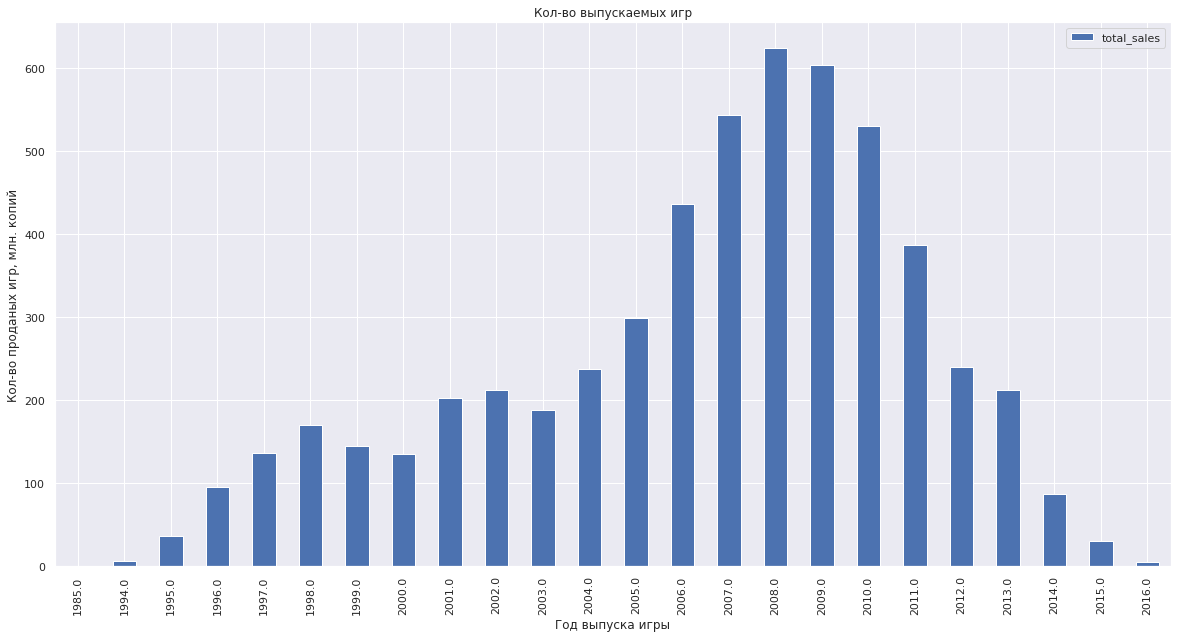

In [107]:
plot_bar(df_games_top, 'year_of_release', 'total_sales', 'sum')

График повторяет распределение по сем платформам.

Постморим распределение по годам отдельно по каждой платформе

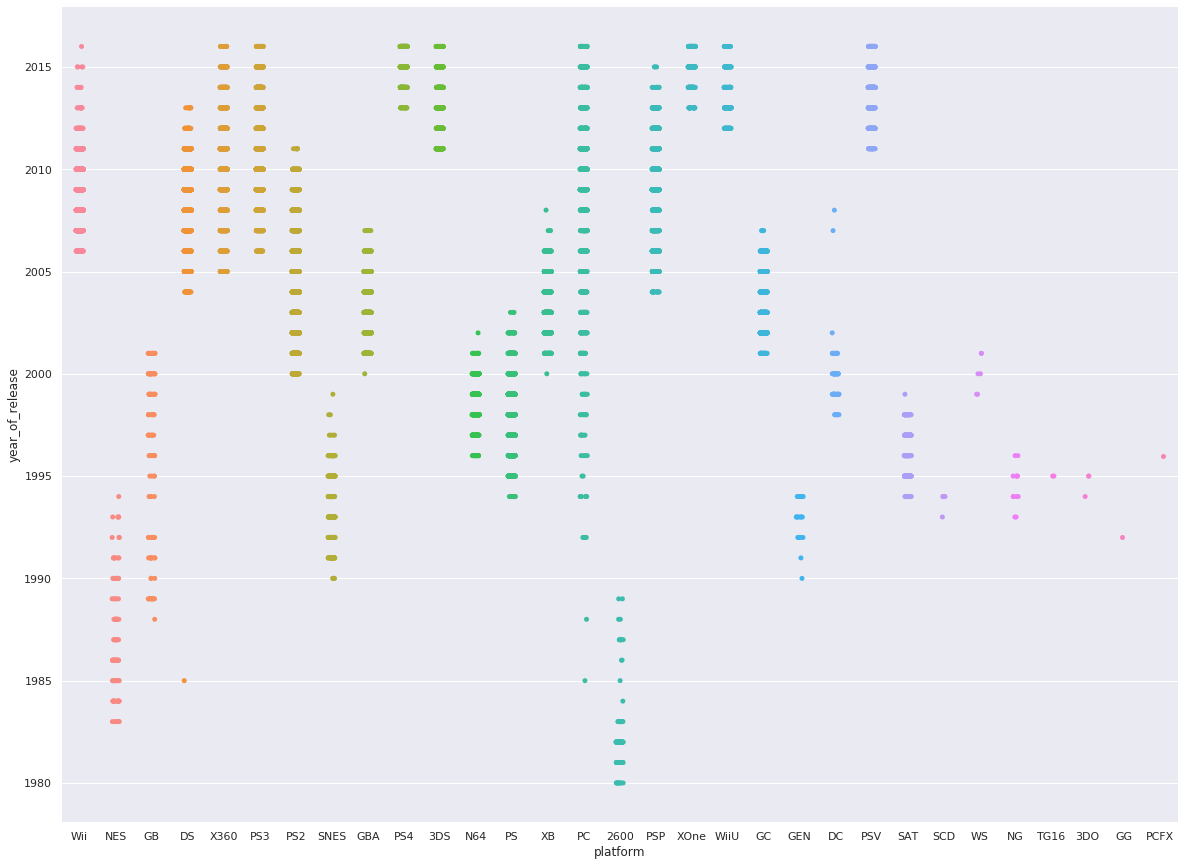

In [108]:
f, ax = plt.subplots(figsize=(20,15))
sns.despine(bottom=True, left=True)
sns.stripplot(x="platform", y="year_of_release",
              data=df_games, dodge=True, zorder=10)

Распределение по топ-6 платформ.

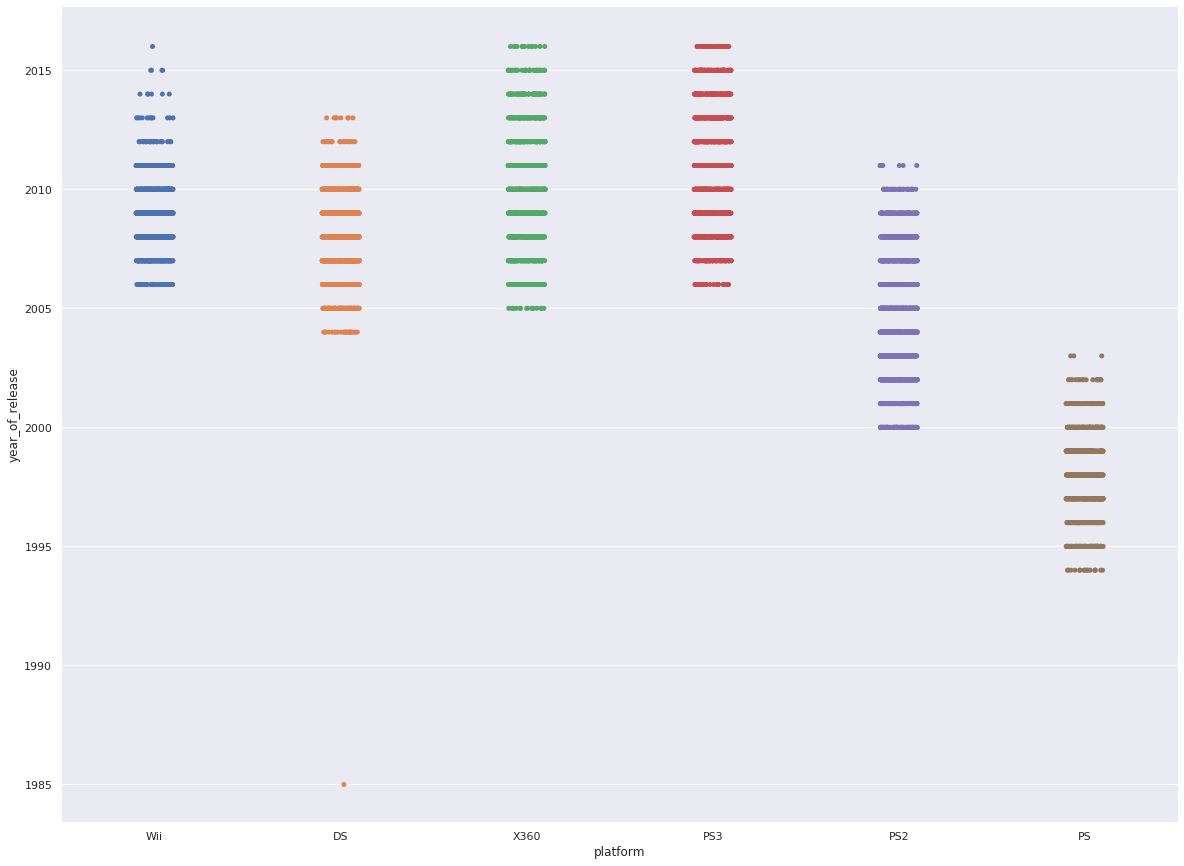

In [109]:
f, ax = plt.subplots(figsize=(20,15))
sns.despine(bottom=True, left=True)
sns.stripplot(x="platform", y="year_of_release",
              data=df_games_top, dodge=True, zorder=10)


PC самая долговечная платформа, это и понятно)) Но из-за немногочисленных игр, которые выходят на PC, ставку на него делать не стоит.

* PS - "Прожила" с 1994 года до 2003, почти 10 лет
* PS2 - с 2000 до 2011 года - 11 лет
* PS3 - с 2006 по настоящее время ещё живёт, но начала сильно сдавать позиции с выходом в 2013 году PS4
* DS - вышла в 1985, потом вообще нет данных, скорее всего, по той причине, что они не собирались. И с 2004 года популярность стала расти, конец срока службы - 2013 год - 8 активных лет жизни
* Wii - с 2006 по нынешний день, но в 2016 уже почти изжила себя - опять 10 лет

Таким образом, в среднем консоль живет 10 лет. И жила бы больше, если б не выходили более новые консоли. Но это неизбежно, т.к. прогресс идет вперед и "железо" в старых консолях перестает отвечать техническим требованиям новых игр.

### 3.3. Актуальный период

Возмем период который начинается с 2005 года. Потому что игры для платформ, которые закончили свое существование до 2005 года, вряд ли начнут выпускать.

Возмем период около половины жизненного цикла, 5 лет, в этом периоде мы увидим и рост и падение продаж платформ.

In [110]:
df_games_after_2011 = df_games.query('year_of_release >= 2011').reset_index()
df_games_after_2011 = df_games_after_2011.drop(columns=['index'])
df_games_after_2011

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
3,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NO,14.63
4,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NO,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
4019,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NO,0.01
4020,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NO,0.01
4021,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NO,0.01
4022,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NO,0.01


### 3.4. Отбор потенциально прибыльных платформ.

Какие платформы лидируют по продажам, растут или падают?

Построим ещё один график, отображающий динамику продаж по уже актуальным годам.

Для удобства напишем функцию для линейного графика.

In [111]:
def plot_line(df, ind, colu, valu, agg):
    (df.pivot_table(index=[ind], columns=[colu], values=(valu), aggfunc=(agg))
         .plot(kind='line', style='.-', figsize=(20,10), grid=True)
    )

    plt.xlabel('Год выпуска игры')
    plt.ylabel('Суммарное кол-во млн. проданных копий')
    plt.title('Распределение')
    plt.show()

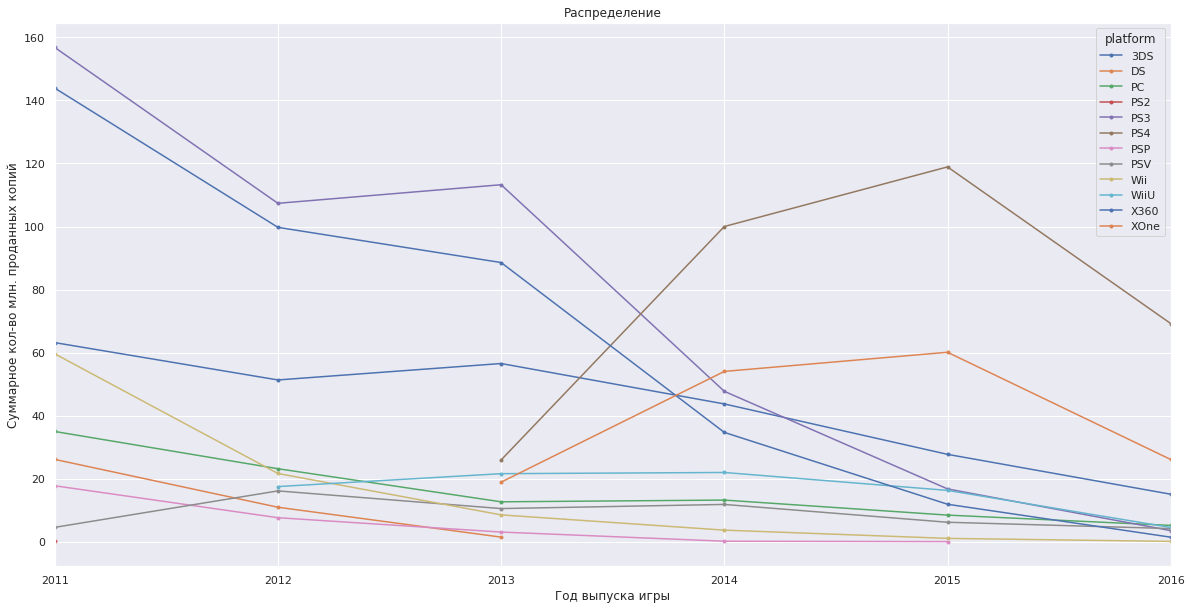

In [112]:
plot_line(df_games_after_2011, 'year_of_release', 'platform', 'total_sales', 'sum')

In [113]:
(df_games_after_2011.query('year_of_release == [2016]')
 .pivot_table(index=['platform'], values=('total_sales'), aggfunc=('sum'))
 .reset_index()
 .sort_values('total_sales', ascending=False)
)

,platform,total_sales
3,PS4,69.25
8,XOne,26.15
0,3DS,15.14
1,PC,5.25
6,WiiU,4.60
4,PSV,4.25
2,PS3,3.60
7,X360,1.52
5,Wii,0.18


На конец 2016 года лидируют по продажам следующие платформы:
* PS4
* Xone
* 3DS

Количество проданных игр, выпущенных на каждую из этих платформ, снижается. Таким образом, можно сказать, что весь рынок игр падает.

### 3.5. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

boxplot по глобальным продажам

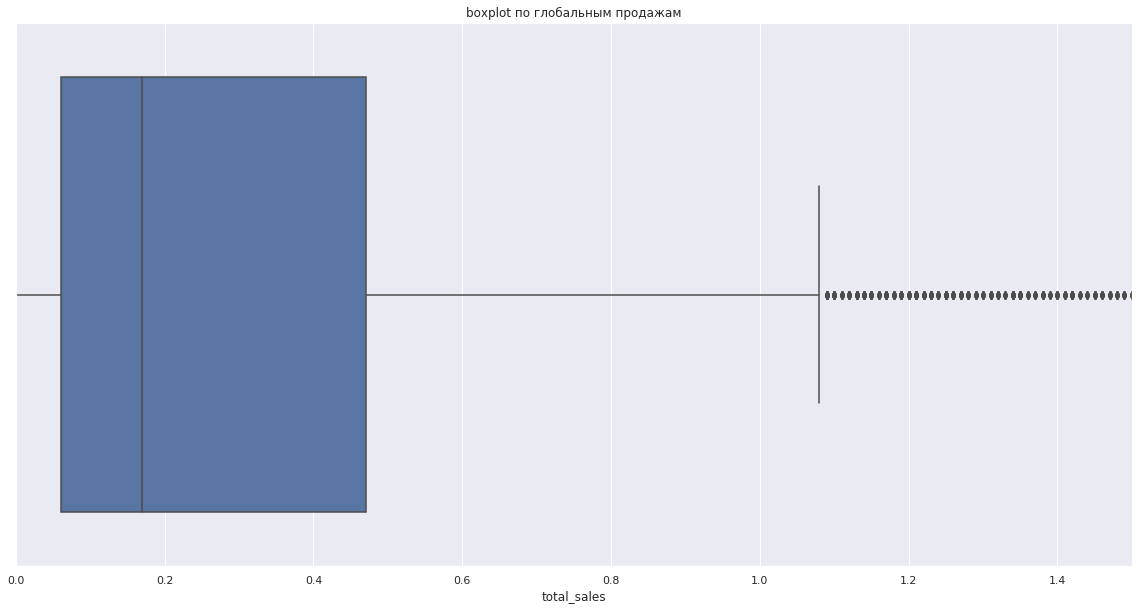

In [114]:
plt.figure(figsize=(20,10))
ax=sns.boxplot(y="total_sales", data=df_games, orient="h")
ax.set_xlim([0, 1.5])
ax.set_title('boxplot по глобальным продажам');

boxplot продаж игр по топовым платформам.

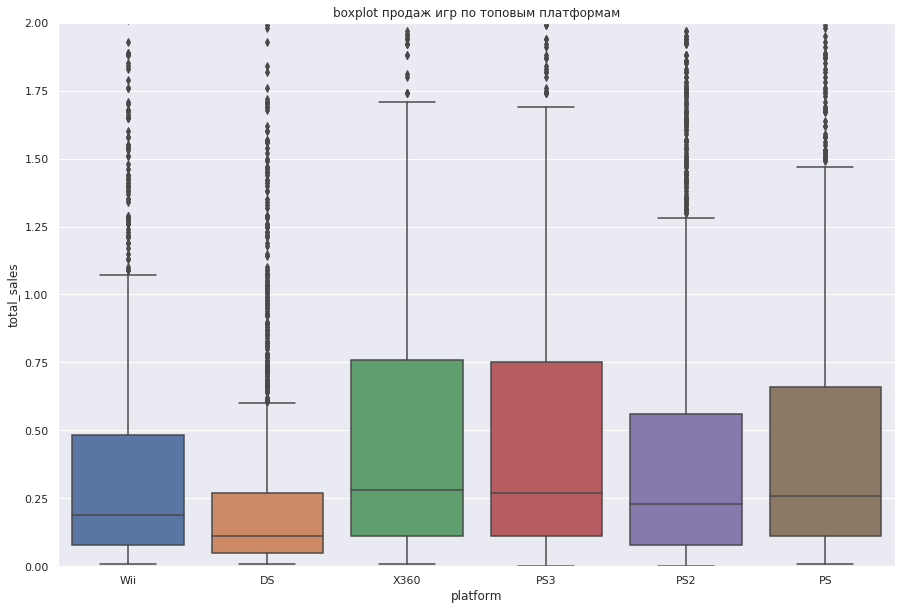

In [115]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="platform", y="total_sales", data=df_games_top)
ax.set_ylim([0, 2])
ax.set_title('boxplot продаж игр по топовым платформам');

Медиана по топовым платформам варьируется от 0,2 до 0,25 млн проданых копий игр.
Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS3 и X360 - на уровне 1,7 млн.
У остальных - от 1 до 1,5 млн.
Среди всех выделяется DS - у него эти показатели сильное ниже. Медиана < 0,1 млн., верхняя граница - 0,6 млн.

boxplot продаж игр по платформам топ-3 на 2016 год.

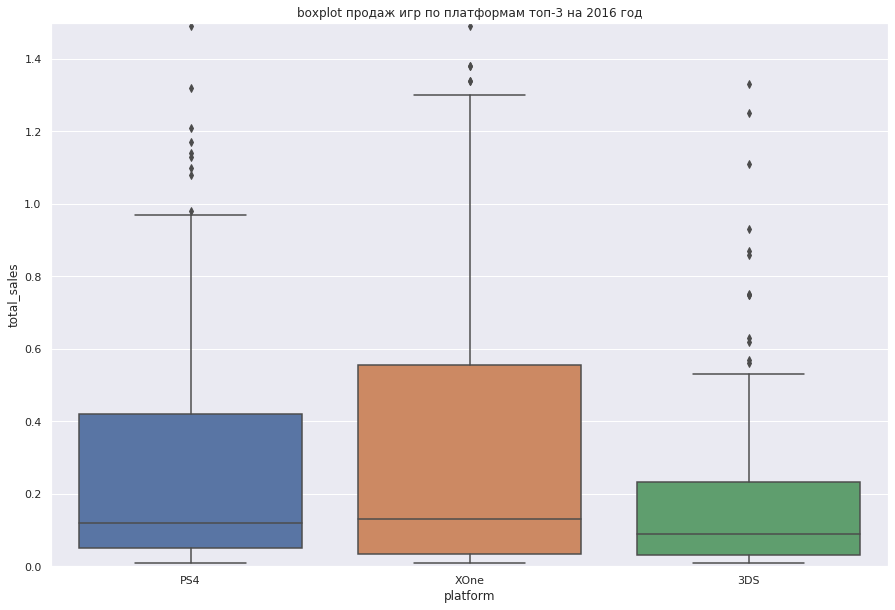

In [116]:
plt.figure(figsize=(15,10))
ax = (sns.boxplot(x="platform", y="total_sales",
                  data=df_games_after_2011.query('platform == ("PS4", "XOne", "3DS") and year_of_release == (2015, 2016)'))
     )
ax.set_ylim([0, 1.5])
ax.set_title('boxplot продаж игр по платформам топ-3 на 2016 год');

Медиана варьируется от 0,1 до 0,15 млн проданых копий игр. Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS4 и XOne - на уровне 1,0-1,3 млн. У 3DS не такие хорошие показатели. Медиана < 0,1 млн., верхняя граница < 0,6 млн.

### 3.6. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

PS4

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Диаграмма рассеяния зависимости общей суммы продаж игры от отзывов критиков

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


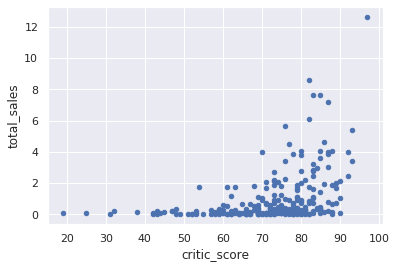

In [145]:
df_games.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter', grid=True)
plt.show()

С увеличением среднего рейтинга критиков увеличивается и средний уровень продажи игр, что логично: чем качественнее игра, тем больше денег она приносит разработчику и издателю.

Диаграмма рассеяния зависимости общей суммы продаж игры от отзывов пользователей

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


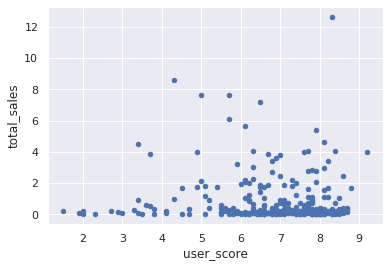

In [118]:
df_games.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter', grid=True)
plt.show()

Точно такая же картина, правда выбросов больше - когда рейтинг пользователей не велик, но тем не менее игра собирает большие деньги. В пример могу привести те же последние игры серии Need for Speed, когда все покупают игру, принося разработчикам прибыль, а потом расстраиваются, увидев, какая эта игра, и ставят ей довольное средние оценки.

Матрица корреляции

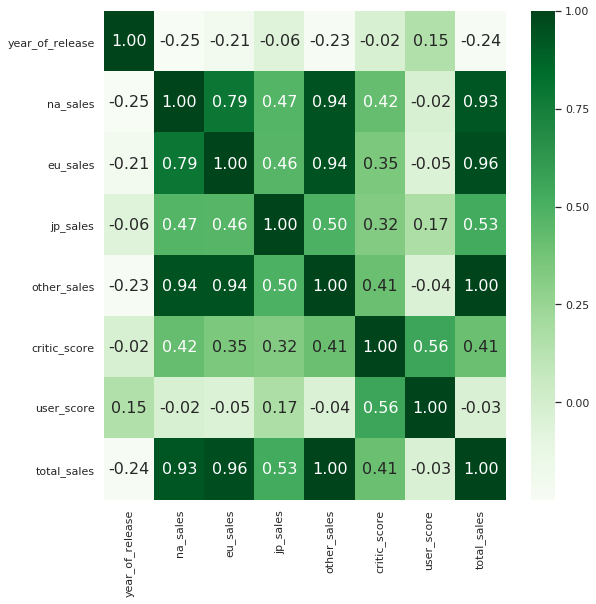

In [119]:
plt.figure(figsize=(9,9))
sns.heatmap(df_games.query('platform == "PS4"').corr(), annot=True, cmap="Greens", fmt='.2f', annot_kws={'size':16});

Выделим нужные нам данные

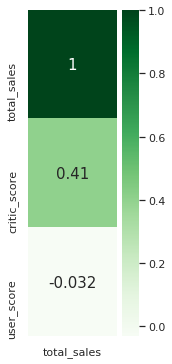

In [120]:
df_games_ps4 = df_games[(df_games['platform'] == 'PS4')]
games_ps4_filtered = df_games_ps4[['total_sales' ,'critic_score', 'user_score']]

plt.figure(figsize=(2,6))
sns.heatmap(games_ps4_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), cmap="Greens", 
            annot=True, annot_kws={'size':15});

In [121]:
df_games.query('platform == "PS4"')['user_score'].corr(df_games.query('platform == "PS4"')['total_sales'])

-0.031957110204556424

In [122]:
df_games.query('platform == "PS4"')['critic_score'].corr(df_games.query('platform == "PS4"')['total_sales'])

0.40656790206178095

Сильнее всего на конечную стоимость влияет оценка критиков. Практически не влияет - оценка пользователей.

### 3.7. Соотнесём выводы с продажами игр на других платформах.

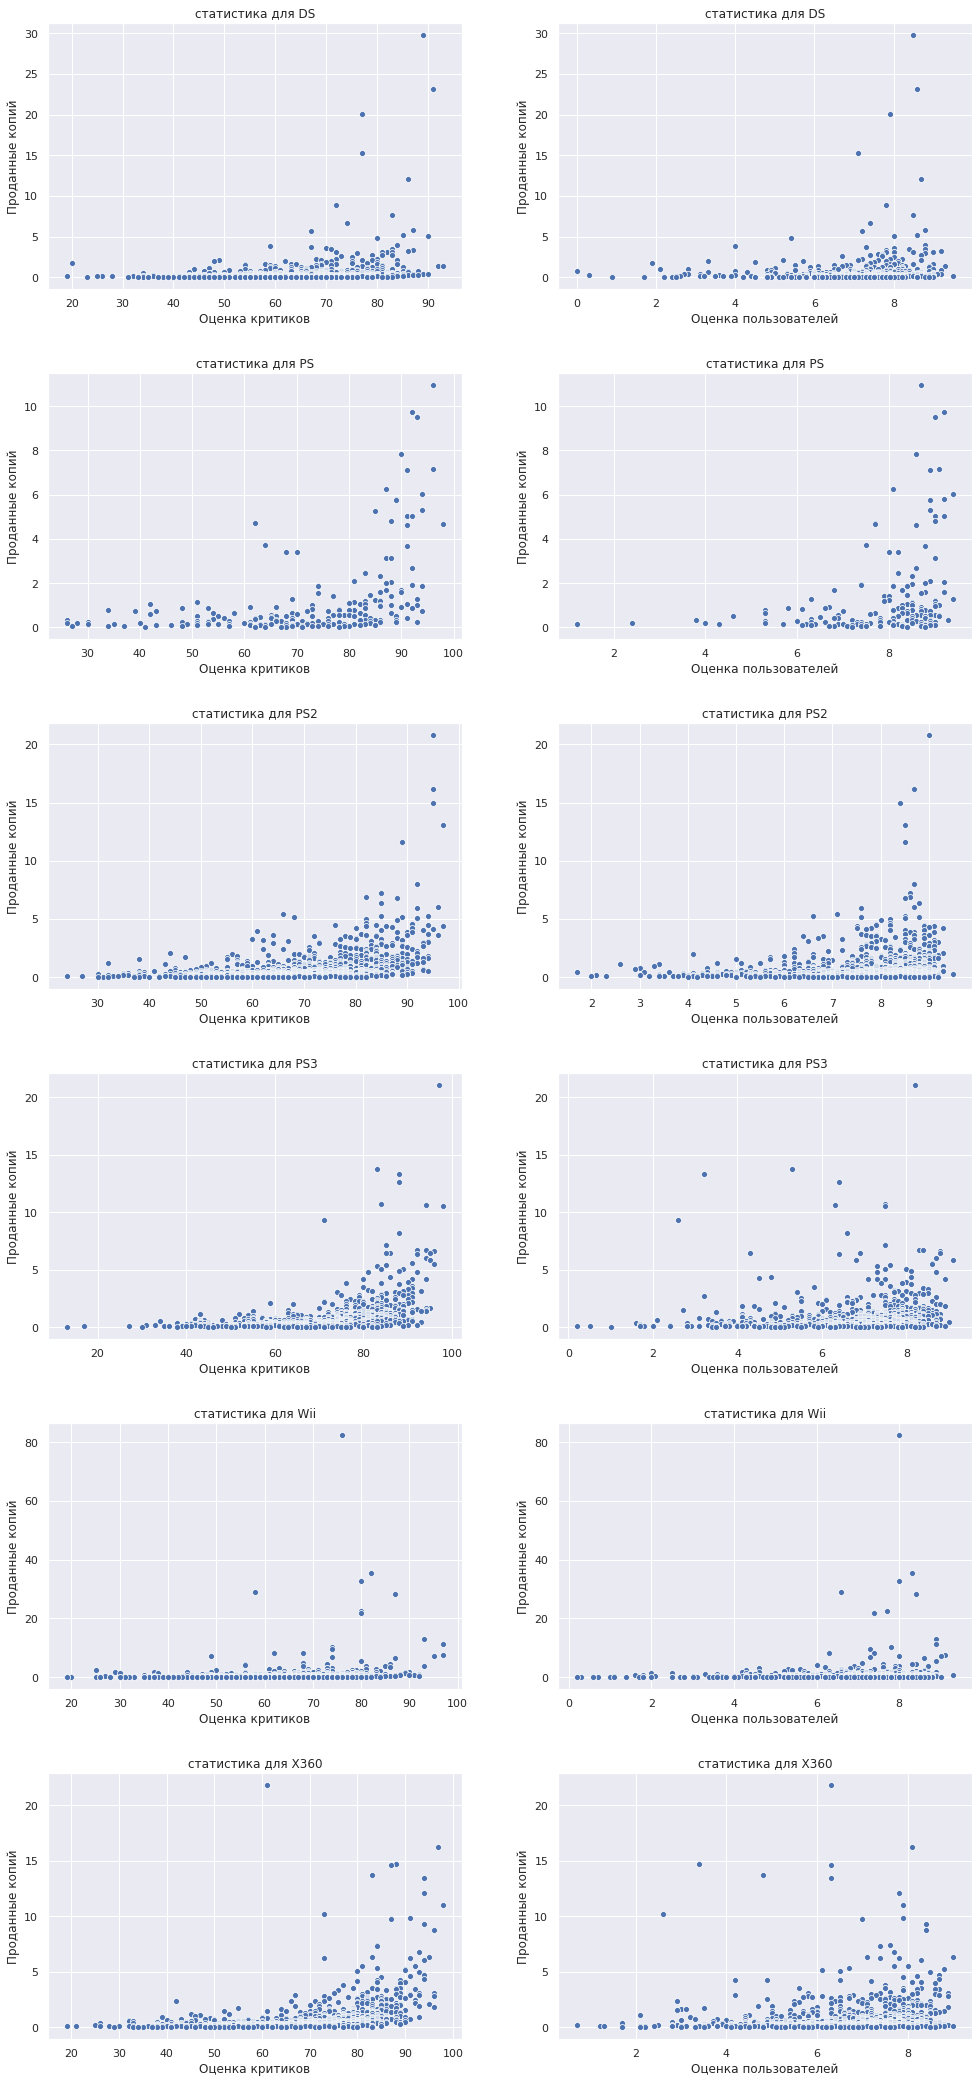

In [123]:
fig, axes = plt.subplots(nrows=(len(top_platform)), ncols=2, figsize=(15,30))
fig.tight_layout(pad=5.0)


for i in range (len(top_platform)): 
    crit_score_df  = df_games.loc[df_games['platform'] == top_platform[i]]
    user_score_df = df_games.loc[df_games['platform'] == top_platform[i]]
    ax1 = axes[i][0]
    ax2 = axes[i][1]
    sns.scatterplot(data=crit_score_df, x="critic_score", y="total_sales", ax = ax1)
    sns.scatterplot(data=user_score_df, x="user_score", y="total_sales", ax = ax2)
    ax1.set_title('статистика для '+ top_platform[i])
    ax1.set_xlabel('Оценка критиков')
    ax1.set_ylabel('Проданные копий')
    ax2.set_title('статистика для '+ top_platform[i])
    ax2.set_xlabel('Оценка пользователей')
    ax2.set_ylabel('Проданные копий')   

Такая же картина как и у PS4. С увеличением среднего рейтинга критиков или пользователей, увеличивается и средний уровень продажи игр.

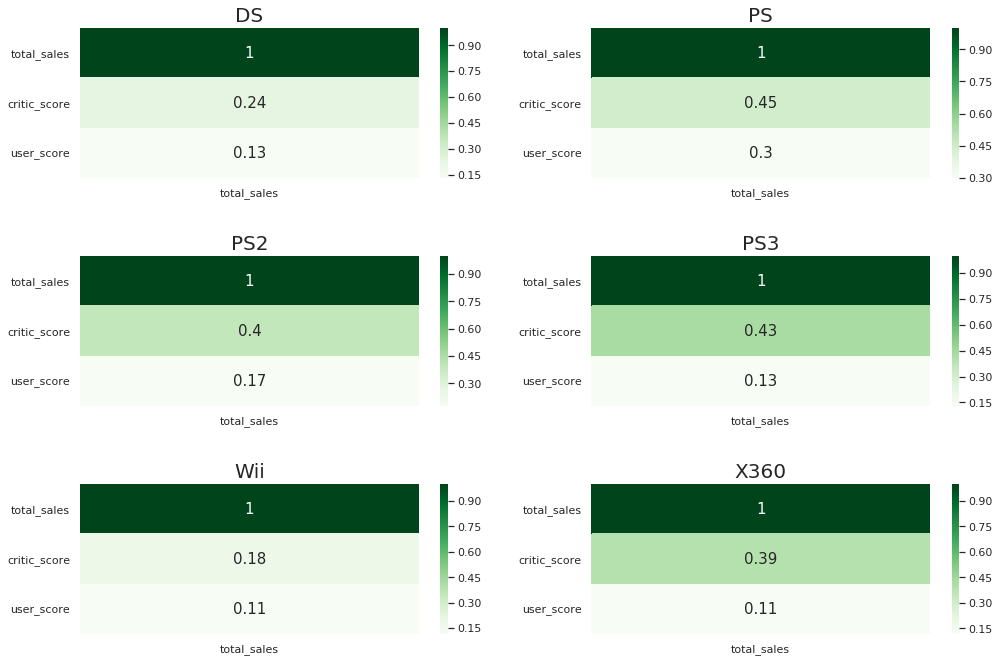

In [124]:
rows = len(top_platform) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,10))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platform[count]
        df_prep = df_games[df_games['platform'] == curr_platform].copy()
        
        df_filtered = df_prep[['total_sales' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), 
                         cmap="Greens", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Данные по корреляции между продажами и оценкой по платформам PS2, X360, PS3, PS и XOne более или менее совпадает с общими данными по датафрейму.
Выделяются Wii и DS, по которым зависимость не такая большая.

### 3.8. Посмотрим на общее распределение игр по жанрам. 

Самые прибыльные жанры. Выделяются ли жанры с высокими и низкими продажами?

In [125]:
df_games.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

,genre,total_sales
0,Action,1744.17
10,Sports,1331.27
8,Shooter,1052.45
7,Role-Playing,934.56
4,Platform,827.77
3,Misc,802.51
6,Racing,728.67
2,Fighting,447.53
9,Simulation,389.97
5,Puzzle,242.57


Экшен игры, спортивные, стрелялки и RPG самые прибыльные жанры игр.

Посмотрим на график.

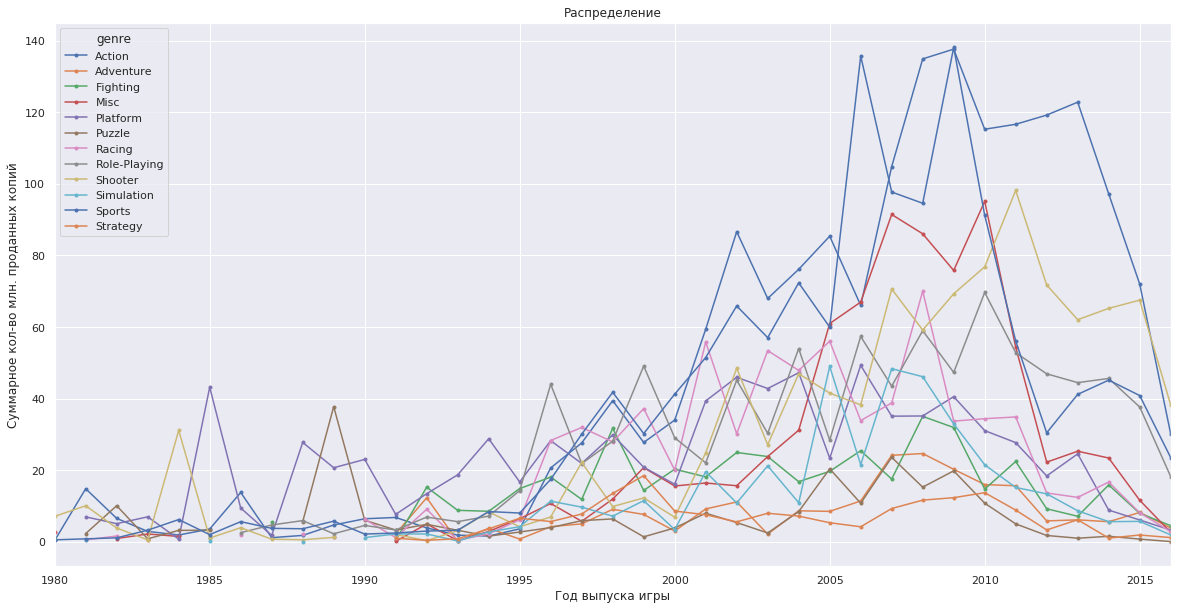

In [126]:
plot_line(df_games, 'year_of_release', 'genre', 'total_sales', 'sum')

Эти 4 жанра в топе уже как минимум лет 10.

Цифры по последним 2ум годам.

In [127]:
(df_games.query('year_of_release == (2015, 2016)')
         .pivot_table(index=['genre'], columns=('year_of_release'), values=('total_sales'), aggfunc=('sum'))
         .reset_index()
         .sort_values(by=2016.0, ascending=False)
)

year_of_release,genre,2015.0,2016.0
8,Shooter,67.51,38.22
0,Action,72.02,30.11
10,Sports,40.84,23.49
7,Role-Playing,37.64,18.18
2,Fighting,7.90,4.47
1,Adventure,8.16,3.82
4,Platform,6.05,3.23
6,Racing,8.07,2.79
3,Misc,11.57,2.60
9,Simulation,5.66,1.89


В 2016 году самые прибыльные жанры это Стрелялки, Экшн, Спортивные игры и RPG

## Шаг 4. Составим портрет пользователя каждого региона

Самые популярные платформы (топ-5), для периода с 2011грода.

In [128]:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = df_games_after_2011.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_dict = {'na_sales': None, 'eu_sales': 'gray', 'jp_sales': 'forestgreen'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                      fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

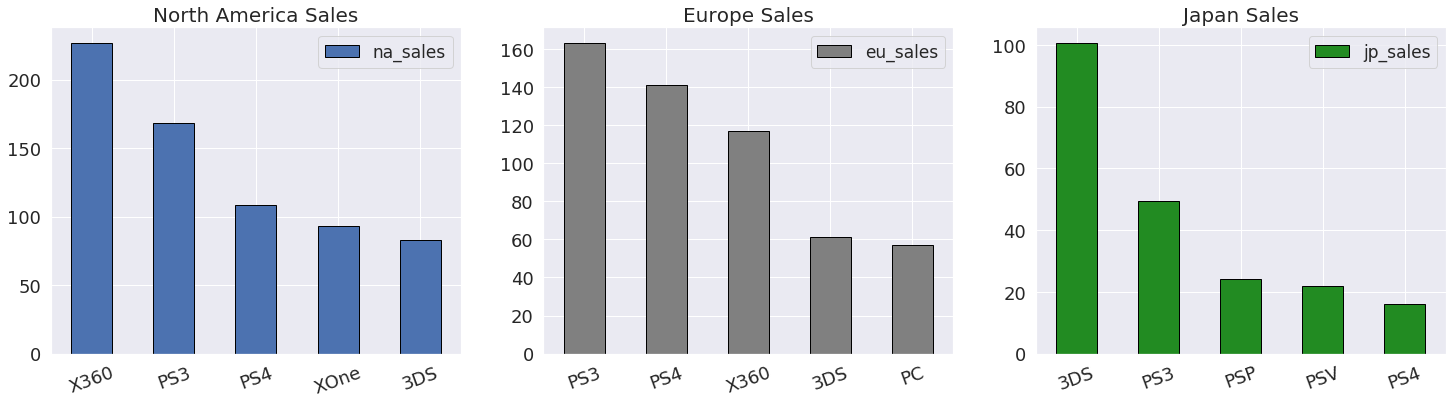

In [129]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

В Северной Америке популярные приставки X360 и PS3. Немного отстает PS4, а XOne и 3DS завершают рейтинг.

В Европе одинаково популярны PS3 и PS4. За ними идут X360, 3DS и PC.

В Японии всё наоборот. Лидер - 3DS. За ними PS3 и PSP. Далее PSV и PS4.

Самые популярные жанры (топ-5).

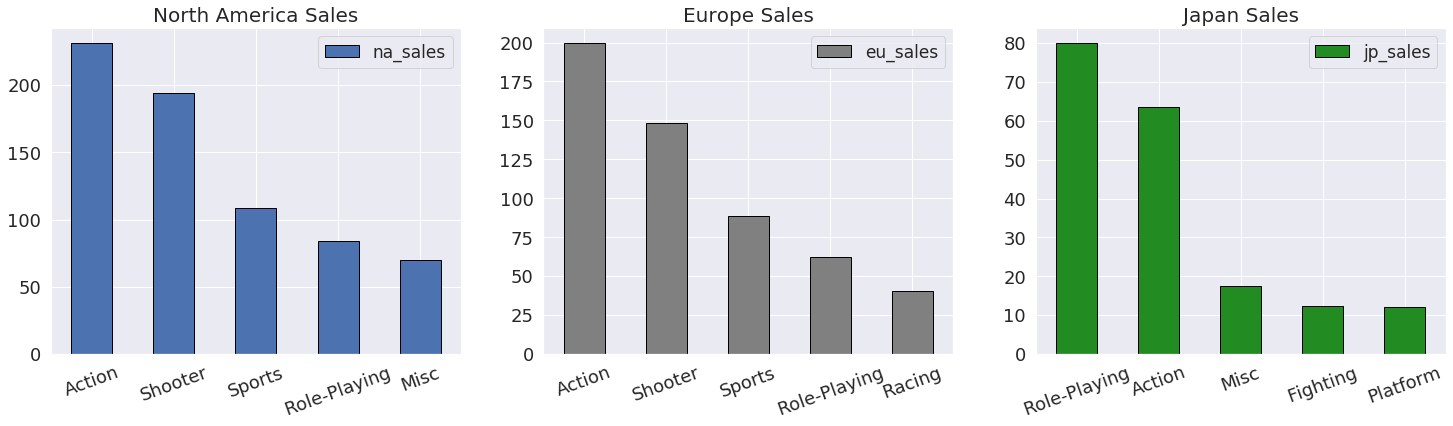

In [130]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

В Северной Америке популярные жанры (топ-4), как  в Европе action, shooter, sport и RPG.

В Японии на первом месте RPG, на втором - action. Причем первые 2 места сильно оторвались от остальных (Music, Fighters, Platform).

Влияет ли рейтинг ESRB на продажи в отдельном регионе?


Добавим новый столбец в основной датафрейм с разъяснением, какая буква рейтинга что означает:

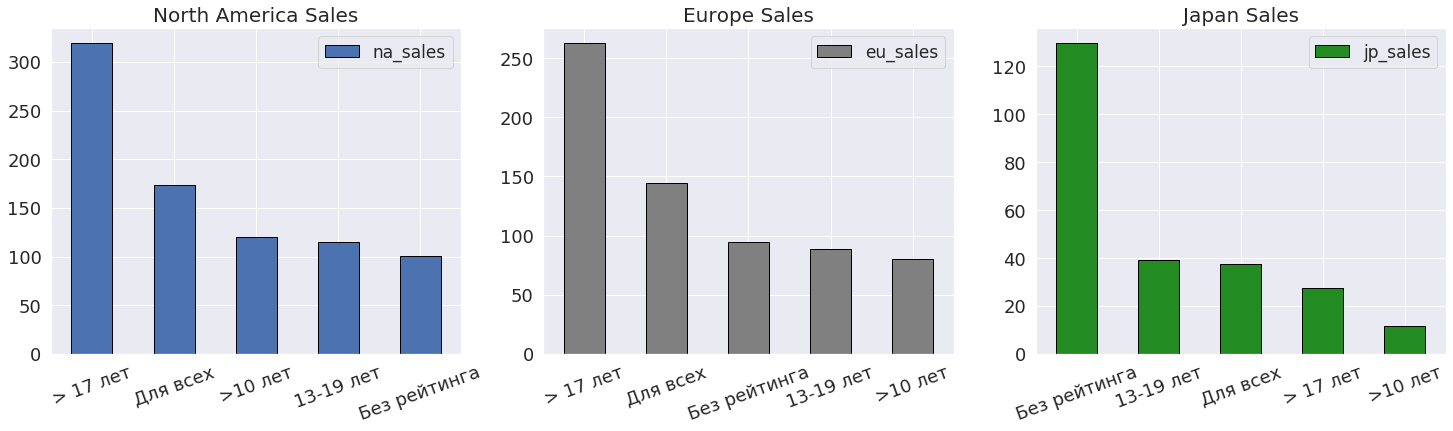

In [131]:
ESRB_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'EC': '>3лет', 'NO': 'Без рейтинга',
             'RP': 'Рейтинг ожидается'}

df_games_after_2011['ESRB_description'] = df_games_after_2011[df_games_after_2011['rating'].notnull()]['rating'].map(ESRB_dict)


fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('ESRB_description', 'na_sales', 0)
top_in_regions_plot('ESRB_description', 'eu_sales', 1)
top_in_regions_plot('ESRB_description', 'jp_sales', 2)

В Северной Америке и в Европе картина практически одинаковая. Большая часть продаж игр с рейтингом "для лиц старше 17 лет", второе место - "Для всех" остальные (">10 лет", "13-19 лет" и "Без рейтинга") почти поровну.

В Японии опять отличается, первое место, при чем с большим отрывом - "Без рейтинга", второе "13-19 лет", потом "Для всех и "старше 17 лет".Игры с рейтингом ">10 лет" крайне мало.

# Шаг 5. Проверьте гипотезы
## 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для проверки будем использовать t-критерий Стьюдента, т.к. в обоих случаях выборки независимы между собой.
Определим пороговое значение alpha = 0.05

Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [132]:
df_games_after_2011.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ESRB_description
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,> 17 лет
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,> 17 лет
2,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73,> 17 лет
3,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NO,14.63,Без рейтинга
4,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NO,14.60,Без рейтинга


Сначала создадим 2 таблицы средних пользовательских рейтингов для платформ Xbox One и PC.

In [133]:
xbox_one_ratings = df_games_after_2011.query('(platform == "XOne") and (user_score > 0)')['user_score']
pc_ratings = df_games_after_2011.query('(platform == "PC") and (user_score > 0)')['user_score']

Посмотрим на их дисперсии.

In [134]:
variance_xbox = np.var(xbox_one_ratings, ddof=1)
variance_xbox

1.9069968429360695

In [135]:
variance_pc = np.var(pc_ratings, ddof=1)
variance_pc

2.6014594525995176

Очевидно что эти дисперсии отличаются более чем на 5% друг от друга. И по этому считаем отличие значимым и выбираем equal_var = False.

Но проверим это по тесту Левина:

Если результирующее p-значение критерия Левена (pvalue) меньше уровня значимости (0,05), полученные различия в дисперсиях выборки вряд ли возникли на основе случайной выборки из генеральной совокупности с равными дисперсиями. Таким образом, нулевая гипотеза о равных дисперсиях отклоняется и делается вывод, что существует разница между дисперсиями в совокупностях.

In [136]:
st.levene(xbox_one_ratings, pc_ratings)

LeveneResult(statistic=5.6013279857619604, pvalue=0.018336332896231867)

Тест Левина подтердил наше предположение. Дисперсии отличаются более чем на 5% друг от друга. Выбираем equal_var = False

In [137]:
alpha = 0.05
results = st.ttest_ind(xbox_one_ratings, pc_ratings, equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.6472796468613693
Не получилось отвергнуть нулевую гипотезу


***Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.***

## 5.2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.

Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

Аналогично, сначала создадим 2 таблицы средних пользовательских рейтингов для жанров Action и Sports.

In [138]:
action_ratings = df_games_after_2011.query('(genre == "Action") and (user_score > 0)')['user_score']
sports_ratings = df_games_after_2011.query('(genre == "Sports") and (user_score > 0)')['user_score']

Посмотрим на их дисперсии.

In [139]:
variance_actio = np.var(action_ratings, ddof=1)
variance_actio

1.8136182172298219

In [140]:
variance_sports = np.var(sports_ratings, ddof=1)
variance_sports

2.8825095404015264

Очевидно что эти дисперсии отличаются более чем на 5% друг от друга. И по этому считаем отличие значимым и выбираем equal_var = False.

Но проверим это по тесту Левина (pvalue должно быть меньше 0,05)

In [141]:
st.levene(xbox_one_ratings, pc_ratings)

LeveneResult(statistic=5.6013279857619604, pvalue=0.018336332896231867)

Тест Левина подтердил наше предположение. Дисперсии отличаются более чем на 5% друг от друга. Выбираем equal_var = False

In [142]:
alpha = 0.05
results = st.ttest_ind(action_ratings, sports_ratings, equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 7.005617172462953e-19
Отвергаем нулевую гипотезу


***Cредние пользовательские рейтинги жанров Action и Sports отличаются между собой.***

Посмотрим как именно отличаются

In [143]:
print('Средний пользовательский рейтинг Action - {:.2f}'.format(action_ratings.mean()))
print('Средний пользовательский рейтинг Sports - {:.2f}'.format(sports_ratings.mean()))

Средний пользовательский рейтинг Action - 6.78
Средний пользовательский рейтинг Sports - 5.65


# Шаг 6. Напишите общий вывод

По проведенному анализу: самое сильное влияние на итоговые продажи игр оказывают, в большинстве случаев, оценки критиков. Rоэффициент корреляции = 0.41 Оценки пользователей не так сильно влияют на продажи коэффициент корреляции = -0.032.

В целом про положение дел в игровой индустрии: рынок "немобильных" игр постепенно погибает. Все сейчас в погоне за графикой, новыми технологями, в связи с этим средний бюджет на разработку одной игры за последние годы заметно вырос. Более того, сейчас игрок не так ценит идею и глубины игры, большинство может обрадовать только хорошая картинка и оптимизация - а играть им понравится только в том случае, если в игре будут стрелочки куда идти. Иначе это слишком трудно.

В итоге, гиганты игровой индустрии гоняются за технологиями, а более мелкие компании, не имеющие таких бюджетов, вынуждены отступать, т.к. единственный их козырь - способность создать глубокую игру с атмосферной - сегодня не ценится.

Всё это привело к тому, что рынок уже который год падает. И, скорее всего, будет падать, потому что тенденции к изменению ценностей на те, которые были всего с десяток лет назад, нет.

Популярные платформы на момент 2016 года:
* PS4
* Xone
* 3DS

Популярные жанры на момент 2016 года:
* Shooter
* Action
* Sports
* RPG

"Портрет" пользователей:
* В северной Америке играют восновном на X360, PS3 и PS4 в action игры и в shooter, меньше в спортивные игры.
* В Европе играют восновном на PS3, PS4 и X360 в action игры и в shooter, меньше в спортивные игры.
* В Японии играют восновном на 3DS, PS3, PSP в RPG и в action игры.

Исходя из статистического анализа:
* Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Cредние пользовательские рейтинги жанров Action и Sports отличаются между собой.
  * Средний пользовательский рейтинг Action - 6.78
  * Средний пользовательский рейтинг Sports - 5.65